In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, f1_score

## Here's a brief version of the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale


In [65]:
df = pd.read_csv(r"\Users\harsh\Untitled Folder 4\train.csv")

In [66]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [67]:
print(len(df))

1460


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [69]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Calculate the percentage of NaN Values

In [70]:
# Specify the number of chunks you want (e.g., 10)
num_chunks = 10

# Calculate and print NaN percentage for each chunk of columns
chunk_size = len(df.columns) // num_chunks

for i in range(0, len(df.columns), chunk_size):
    chunk_columns = df.columns[i:i + chunk_size]
    nan_percentage = (df[chunk_columns].isna().sum() / len(df)) * 100
    print(f"NaN percentages for columns {chunk_columns}:")
    print(nan_percentage)
    print()

NaN percentages for columns Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape'],
      dtype='object'):
Id              0.000000
MSSubClass      0.000000
MSZoning        0.000000
LotFrontage    17.739726
LotArea         0.000000
Street          0.000000
Alley          93.767123
LotShape        0.000000
dtype: float64

NaN percentages for columns Index(['LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType'],
      dtype='object'):
LandContour     0.0
Utilities       0.0
LotConfig       0.0
LandSlope       0.0
Neighborhood    0.0
Condition1      0.0
Condition2      0.0
BldgType        0.0
dtype: float64

NaN percentages for columns Index(['HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st'],
      dtype='object'):
HouseStyle      0.0
OverallQual     0.0
OverallCond     0.0
YearBuilt       0.0
YearRemodAdd    0.

In [71]:
df_NaN = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","MasVnrType","Electrical"]

In [72]:
df = df.drop(["Alley","PoolQC","Fence","MiscFeature"],axis = 1)

In [73]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Caclculte the Percentage of Zero's and fill them with Mean

In [74]:
# Specify the number of chunks you want (e.g., 10)
num_chunks = 10

# Calculate and print 0 percentage for each chunk of columns
chunk_size = len(df.columns) // num_chunks

for i in range(0, len(df.columns), chunk_size):
    chunk_columns = df.columns[i:i + chunk_size]

    # 0 percentage calculation
    zero_percentage = (df[chunk_columns].eq(0).sum() / len(df)) * 100
    print(f"0 percentages for columns {chunk_columns}:")
    print(zero_percentage)
    print()

0 percentages for columns Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape'],
      dtype='object'):
Id             0.0
MSSubClass     0.0
MSZoning       0.0
LotFrontage    0.0
LotArea        0.0
Street         0.0
LotShape       0.0
dtype: float64

0 percentages for columns Index(['LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2'],
      dtype='object'):
LandContour     0.0
Utilities       0.0
LotConfig       0.0
LandSlope       0.0
Neighborhood    0.0
Condition1      0.0
Condition2      0.0
dtype: float64

0 percentages for columns Index(['BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle'],
      dtype='object'):
BldgType        0.0
HouseStyle      0.0
OverallQual     0.0
OverallCond     0.0
YearBuilt       0.0
YearRemodAdd    0.0
RoofStyle       0.0
dtype: float64

0 percentages for columns Index(['RoofMatl', 'Exterior1st', 'Exterior2n

In [75]:
columns_to_replace_0 = ["MasVnrArea","BsmtFinSF1","BsmtUnfSF","TotalBsmtSF","2ndFlrSF","BsmtFullBath","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","LotFrontage","GarageYrBlt","MasVnrArea","BedroomAbvGr","KitchenAbvGr","FullBath"]

In [76]:
df = df.drop(["BsmtFinSF2","LowQualFinSF","BsmtHalfBath","HalfBath","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"],axis = 1)

In [77]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000


### Replacing Zeros with Mean

In [78]:
# Replace 0 values with mean for the specified columns
for coloumn in columns_to_replace_0:
    mean = df[coloumn].mean()
    df[coloumn] = df[coloumn].replace(0,mean)
    df[coloumn] = df[coloumn].replace(np.NaN,mean)

In [79]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,94.244521,61.000000,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,TA,Y,298.000000,46.660274,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,94.244521,42.000000,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,94.244521,35.000000,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,TA,Y,192.000000,84.000000,12,2008,WD,Normal,250000


### Replacing NaN with Mode Values

In [80]:
# Replace NaN values with mode for the specified columns
for coloumn in df_NaN:
    mode_value = df[coloumn].mode().iloc[0]  # Using iloc[0] to get the first mode in case of multiple modes
    df[coloumn] = df[coloumn].replace(np.NaN,mode_value)

In [81]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,94.244521,61.000000,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,TA,Y,298.000000,46.660274,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,94.244521,42.000000,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,94.244521,35.000000,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,TA,Y,192.000000,84.000000,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,40.000000,30.000000,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,255.000000,57.000000,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,235.000000,204.000000,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,...,Fa,TA,Y,90.000000,46.660274,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,...,Gd,TA,Y,94.244521,4.000000,1,2008,WD,Normal,118000


In [82]:
df = df.drop(["Id","MoSold"], axis=1)

In [83]:
print(df["Condition2"].head(5))

0    Norm
1    Norm
2    Norm
3    Norm
4    Norm
Name: Condition2, dtype: object


In [84]:
corr = df.corr()

C:\Users\harsh\AppData\Local\Temp\ipykernel_14980\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


# HeatMap

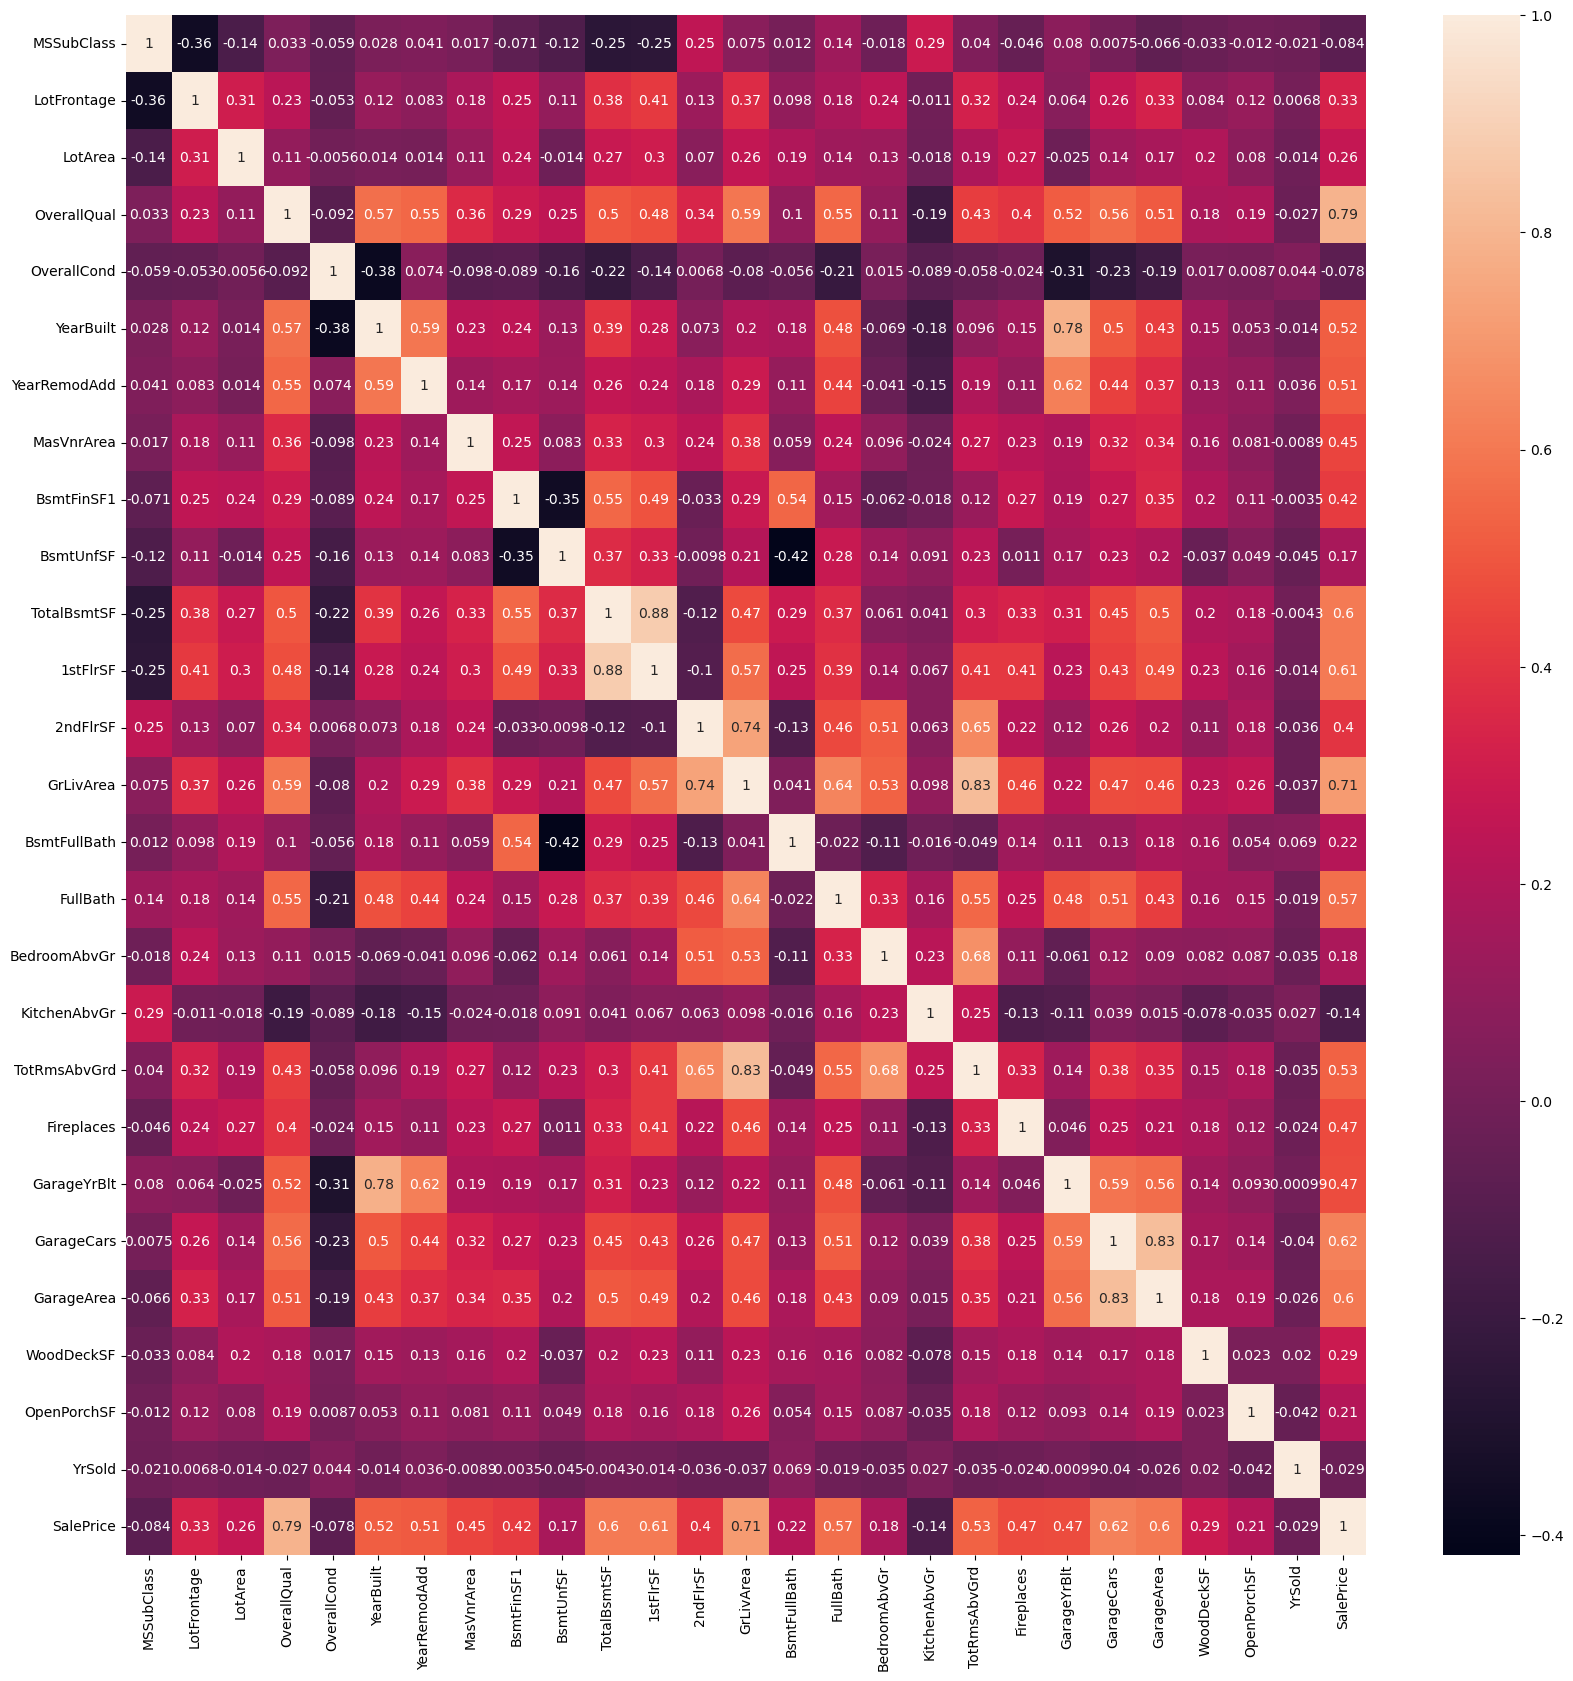

In [85]:
# Define the size of the heatmap (adjust the width and height as needed)
heatmap_size = (20, 20)
# Plot the heatmap with the specified size
plt.figure(figsize=heatmap_size)
# plot heatmap of corelation matrix
sns.heatmap(corr, annot=True)
plt.show()

# Data Handling

# Outlier Treatment on the basis of Variance

In [86]:
#df is my DataFrame
variances = df.var()

# Print or inspect the variances for each column
print(variances)


MSSubClass      1.789338e+03
LotFrontage     4.850576e+02
LotArea         9.962565e+07
OverallQual     1.912679e+00
OverallCond     1.238322e+00
YearBuilt       9.122154e+02
YearRemodAdd    4.262328e+02
MasVnrArea      2.251955e+04
BsmtFinSF1      1.248776e+05
BsmtUnfSF       1.671199e+05
TotalBsmtSF     1.633875e+05
1stFlrSF        1.494501e+05
2ndFlrSF        8.329844e+04
GrLivArea       2.761296e+05
BsmtFullBath    1.008916e-01
FullBath        2.883054e-01
BedroomAbvGr    6.315655e-01
KitchenAbvGr    4.779767e-02
TotRmsAbvGrd    2.641903e+00
Fireplaces      4.155947e-01
GarageYrBlt     5.757400e+02
GarageCars      3.754957e-01
GarageArea      3.260364e+04
WoodDeckSF      8.662278e+03
OpenPorchSF     2.971111e+03
YrSold          1.763837e+00
SalePrice       6.311111e+09
dtype: float64


C:\Users\harsh\AppData\Local\Temp\ipykernel_14980\1059247364.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = df.var()


In [87]:
threshold = 0.1  # Adjust the threshold based on my analysis
# Identify low-variance columns
low_variance_cols = variances[variances < threshold].index
# Print columns with low variance
print("Columns with Low Variance:")
print(low_variance_cols)
# Drop low-variance columns
df = df.drop(low_variance_cols, axis=1)

Columns with Low Variance:
Index(['KitchenAbvGr'], dtype='object')


In [88]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,548.0,TA,TA,Y,94.244521,61.000000,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,460.0,TA,TA,Y,298.000000,46.660274,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,608.0,TA,TA,Y,94.244521,42.000000,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,642.0,TA,TA,Y,94.244521,35.000000,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,836.0,TA,TA,Y,192.000000,84.000000,2008,WD,Normal,250000


# Outlier Treatment using IQR method

In [89]:
# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 3

# Create a boolean mask to identify outliers
outliers_mask = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)

# Create a cleaned DataFrame by removing outliers
df_cleaned = df[~outliers_mask]

# Display information about the cleaning process
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)
#df_copy = df.copy(deep=True)


Original DataFrame shape: (1460, 65)
Cleaned DataFrame shape: (1138, 65)


C:\Users\harsh\AppData\Local\Temp\ipykernel_14980\1557440169.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\harsh\AppData\Local\Temp\ipykernel_14980\1557440169.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\harsh\AppData\Local\Temp\ipykernel_14980\1557440169.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_mask = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axi

In [90]:
#df is my DataFrame
column_names = df_cleaned.columns.tolist()

# Print the list of column names
print(column_names)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']


### Combining two Features OverallQual and OverallCond to OverallScore 

In [91]:
# Add a new feature 'OverallScore' by adding 'OverallQual' and 'OverallCond'
df_cleaned['OverallScore'] = df['OverallQual'] + df['OverallCond']
df_cleaned = df_cleaned.drop(['OverallQual','OverallCond'],axis=1)

C:\Users\harsh\AppData\Local\Temp\ipykernel_14980\1491675375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['OverallScore'] = df['OverallQual'] + df['OverallCond']


In [92]:
print(df_cleaned['OverallScore'].head(5))
print(df_cleaned.shape)

0    12
1    14
2    12
3    12
5    10
Name: OverallScore, dtype: int64
(1138, 64)


## Scaling all features to same scale using MinMax Scaler

In [93]:
# Create a copy of the original DataFrame
df_cleaned_scaled = df_cleaned.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Extract numerical columns to scale (   you want to scale all numeric columns)
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Fit and transform the scaler on the numerical columns for the copy DataFrame
df_cleaned_scaled[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# Now, 'df_scaled' contains the scaled values in the numerical columns without affecting 'df_cleaned'

# Example: printing the scaled DataFrame
print(df_cleaned_scaled)


      MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0       0.235294       RL     0.403670  0.320700   Pave      Reg         Lvl   
1       0.000000       RL     0.541284  0.372281   Pave      Reg         Lvl   
2       0.235294       RL     0.431193  0.446288   Pave      IR1         Lvl   
3       0.294118       RL     0.357798  0.370038   Pave      IR1         Lvl   
5       0.176471       RL     0.587156  0.574793   Pave      IR1         Lvl   
...          ...      ...          ...       ...    ...      ...         ...   
1454    0.000000       FV     0.376147  0.278089   Pave      Reg         Lvl   
1455    0.235294       RL     0.376147  0.296793   Pave      Reg         Lvl   
1456    0.000000       RL     0.587156  0.532631   Pave      Reg         Lvl   
1457    0.294118       RL     0.412844  0.347253   Pave      Reg         Lvl   
1458    0.000000       RL     0.431193  0.377529   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ...

## One Hot Encoding for Categorical Features

In [94]:
# Use pd.get_dummies to convert categorical variables to dummy/indicator variables
df_cleaned_scaled = pd.get_dummies(df_cleaned_scaled, drop_first=True)

In [95]:
#df is my DataFrame
column_names = df_cleaned_scaled.columns.tolist()

# Print the list of column names
print(column_names)

['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice', 'OverallScore', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighbo

In [96]:
df_cleaned_scaled.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.403670,0.320700,0.956204,0.883333,0.568513,0.464380,0.064547,0.365806,0.203588,...,0,0,0,0,1,0,0,0,1,0
1,0.000000,0.541284,0.372281,0.759124,0.433333,0.299374,0.643799,0.128144,0.563566,0.361934,...,0,0,0,0,1,0,0,0,1,0
2,0.235294,0.431193,0.446288,0.941606,0.866667,0.469388,0.319261,0.199336,0.396980,0.228549,...,0,0,0,0,1,0,0,0,1,0
3,0.294118,0.357798,0.370038,0.313869,0.333333,0.299374,0.141161,0.249644,0.317097,0.244540,...,0,0,0,0,1,0,0,0,0,0
5,0.176471,0.587156,0.574793,0.883212,0.750000,0.299374,0.481530,0.023730,0.336581,0.180187,...,0,0,0,0,1,0,0,0,1,0


In [97]:
# Extract the target variable 'SalePrice'
y = df_cleaned_scaled['SalePrice']

# Create a new DataFrame without the target variable
X = df_cleaned_scaled.drop('SalePrice', axis=1)

In [98]:
y.head()

0    0.421436
1    0.355734
2    0.457936
3    0.254749
5    0.262049
Name: SalePrice, dtype: float64

In [99]:
X.head(5)

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.403670,0.320700,0.956204,0.883333,0.568513,0.464380,0.064547,0.365806,0.203588,...,0,0,0,0,1,0,0,0,1,0
1,0.000000,0.541284,0.372281,0.759124,0.433333,0.299374,0.643799,0.128144,0.563566,0.361934,...,0,0,0,0,1,0,0,0,1,0
2,0.235294,0.431193,0.446288,0.941606,0.866667,0.469388,0.319261,0.199336,0.396980,0.228549,...,0,0,0,0,1,0,0,0,1,0
3,0.294118,0.357798,0.370038,0.313869,0.333333,0.299374,0.141161,0.249644,0.317097,0.244540,...,0,0,0,0,1,0,0,0,0,0
5,0.176471,0.587156,0.574793,0.883212,0.750000,0.299374,0.481530,0.023730,0.336581,0.180187,...,0,0,0,0,1,0,0,0,1,0


## Finding the ELbow Point for K Means Cluster

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\clust

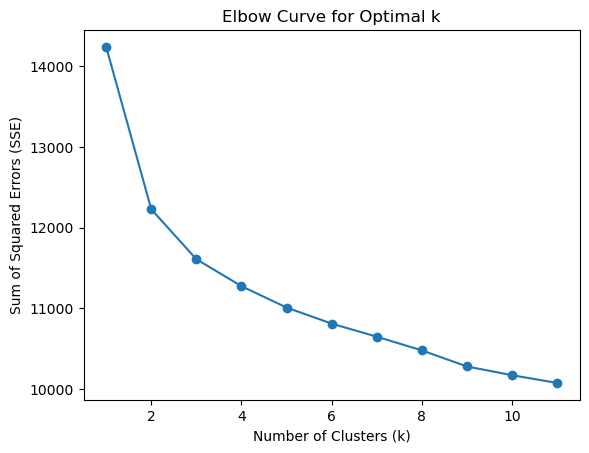

In [100]:
k_rng = range(1, 12)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_cleaned_scaled)
    sse.append(km.inertia_)

# Plotting the Elbow Curve
plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve for Optimal k')
plt.show()

# Optimim K value comes out to be 3

# Visualization

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


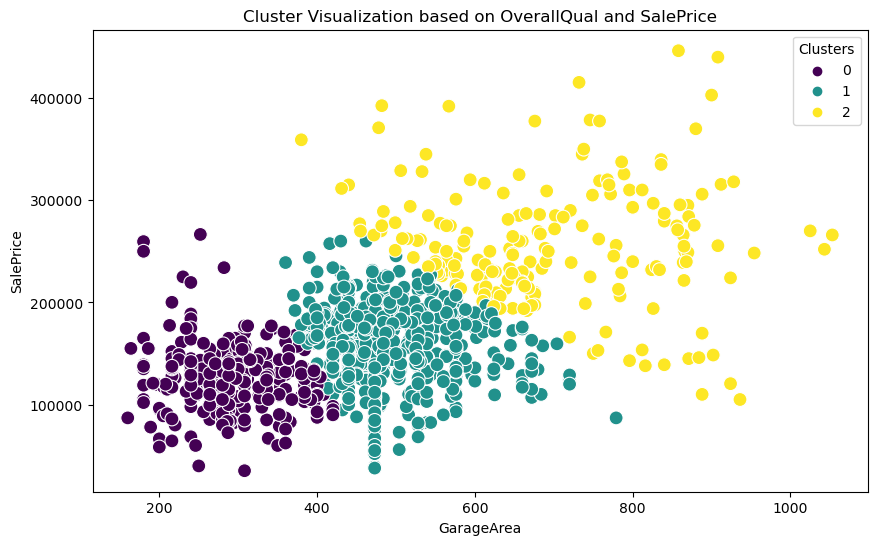

In [101]:
#optimal k using the elbow method
optimal_k = 3  # Replace with my optimal k value

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['Cluster_Labels'] = kmeans.fit_predict(df_cleaned_scaled[['GarageArea', 'SalePrice']])

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GarageArea', y='SalePrice', hue='Cluster_Labels', data=df_cleaned, palette='viridis', s=100)
plt.title('Cluster Visualization based on OverallQual and SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.legend(title='Clusters')
plt.show()


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


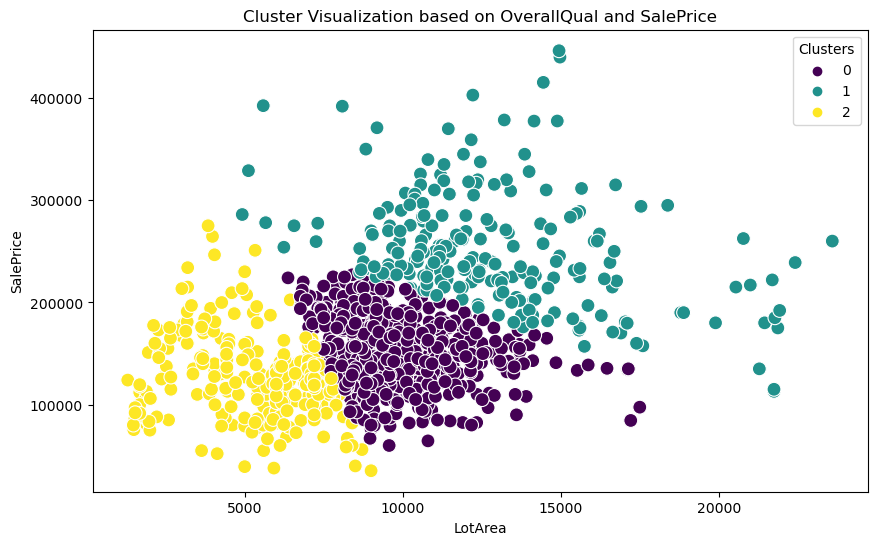

In [277]:
#optimal k using the elbow method
optimal_k = 3  # Replace with my optimal k value

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['Cluster_Labels'] = kmeans.fit_predict(df_cleaned_scaled[['LotArea', 'SalePrice']])

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', hue='Cluster_Labels', data=df_cleaned, palette='viridis', s=100)
plt.title('Cluster Visualization based on OverallQual and SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.legend(title='Clusters')
plt.show()


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


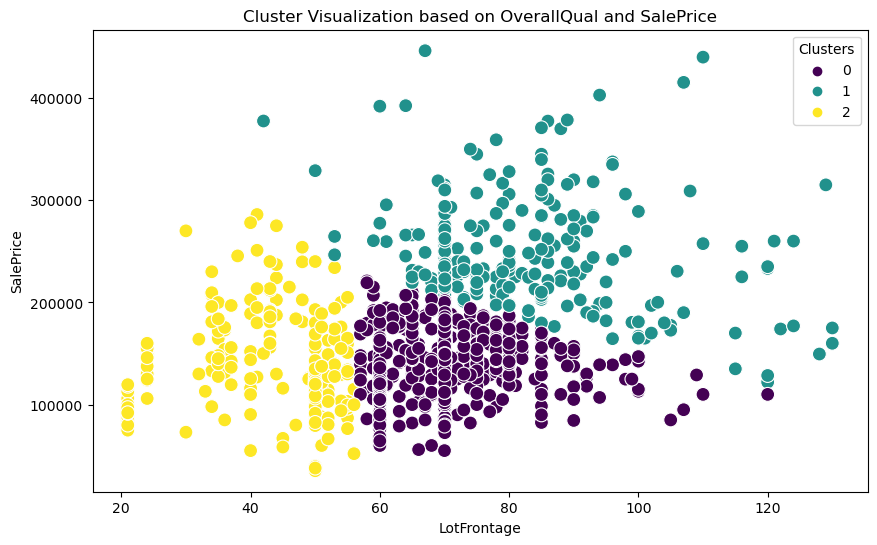

In [278]:
#optimal k using the elbow method
optimal_k = 3  # Replace with my optimal k value

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['Cluster_Labels'] = kmeans.fit_predict(df_cleaned_scaled[['LotFrontage', 'SalePrice']])

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotFrontage', y='SalePrice', hue='Cluster_Labels', data=df_cleaned, palette='viridis', s=100)
plt.title('Cluster Visualization based on OverallQual and SalePrice')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.legend(title='Clusters')
plt.show()


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


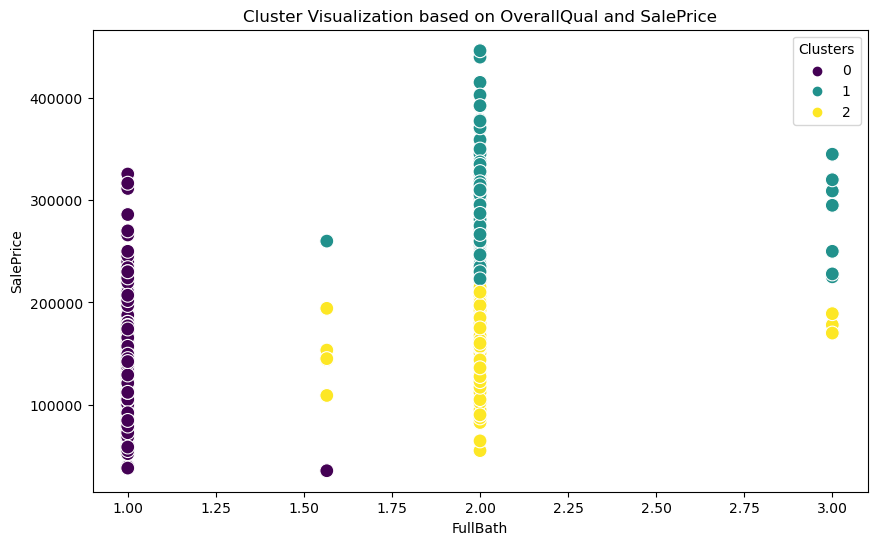

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [281]:
#optimal k using the elbow method
optimal_k = 3  # Replace with my optimal k value

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['Cluster_Labels'] = kmeans.fit_predict(df_cleaned_scaled[['FullBath', 'SalePrice']])

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FullBath', y='SalePrice', hue='Cluster_Labels', data=df_cleaned, palette='viridis', s=100)
plt.title('Cluster Visualization based on OverallQual and SalePrice')
plt.xlabel('FullBath')
plt.ylabel('SalePrice')
plt.legend(title='Clusters')
plt.show()


# Modeling using KNN Regressor to predict House Price

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [237]:
from sklearn.metrics import mean_squared_error

# Create an instance of the KNeighborsRegressor with k=3 and Euclidean distance (p=2)
knn_regressor = KNeighborsRegressor(n_neighbors=3, p=2)

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the performance of the regressor (example metric: mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.006054961088510848


In [238]:
from sklearn.metrics import mean_absolute_error, r2_score

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (Coefficient of Determination): {r2}')


Mean Absolute Error: 0.05368153522468621
R-squared (Coefficient of Determination): 0.7519264971558935


# Model Performance:
### Mean Squared Error: 0.006054961088510848
### Mean Absolute Error: 0.05368153522468621
### R-squared (Coefficient of Determination): 0.7519264971558935


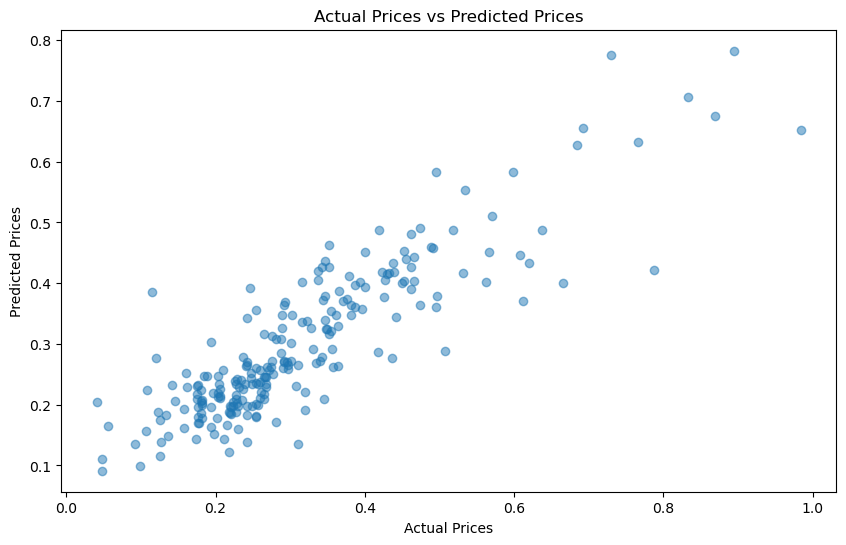

In [275]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# True Vs Predicted Price

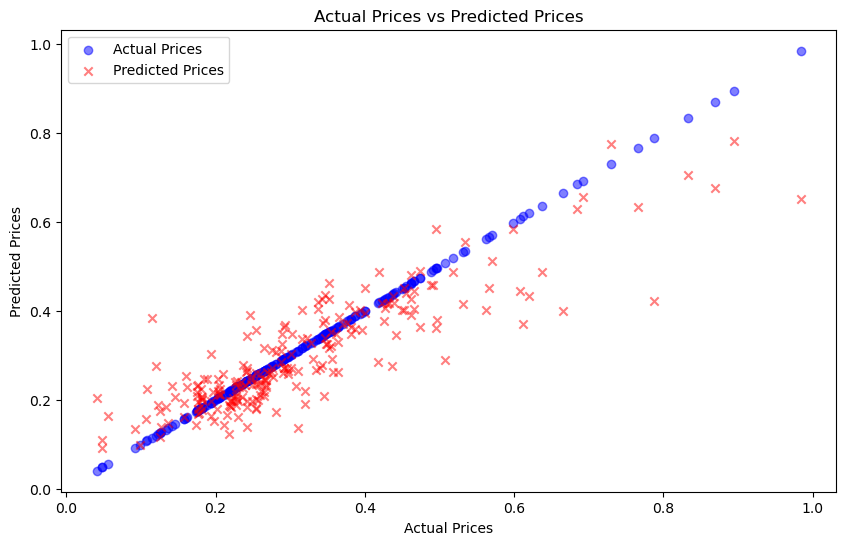

In [105]:
import matplotlib.pyplot as plt

#    y_actual and y_pred are NumPy arrays or pandas Series
# If needed, convert them to the same data type for consistency

plt.figure(figsize=(10, 6))

# Plot actual prices in blue with 'o' markers
plt.scatter(y_test, y_test, color='blue', label='Actual Prices', alpha=0.5, marker='o')

# Plot predicted prices in red with 'x' markers
plt.scatter(y_test, y_pred, color='red', label='Predicted Prices', alpha=0.5, marker='x')

plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()


In [239]:
pip install gradio


In [107]:
#pip freeze


aiofiles==23.2.1
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altair==5.2.0
anaconda-client==1.11.2
anaconda-navigator==2.4.0
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
annotated-types==0.6.0
anyio @ file:///C:/ci/anyio_1644481856696/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569876605/work
arrow @ file:///C:/b/abs_cal7u12ktb/croot/arrow_1676588147908/work
astroid @ file:///C:/b/abs_d4lg3_taxn/croot/astroid_1676904351456/work
astropy @ file:///C:/ci/astropy_1657719642921/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
atomicwrites==1.4.0
attrs @ file:///C:/b/abs_09s3y775ra/croot/attrs_1668696195628/work
audioread==3.0.1
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ fi

## Pre-Processing Test Data For Predecting Prices on scale similar to Train Data

In [211]:
df_test = pd.read_csv(r"\Users\harsh\Untitled Folder 4\test.csv")

In [212]:
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [213]:
df_test = df_test.drop(["Id","Alley","PoolQC","Fence","MiscFeature","BsmtFinSF2","LowQualFinSF","BsmtHalfBath","HalfBath","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","KitchenAbvGr"], axis =1)

In [214]:
df_test.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1.0,730.0,TA,TA,Y,140,0,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1.0,312.0,TA,TA,Y,393,36,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2.0,482.0,TA,TA,Y,212,34,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2.0,470.0,TA,TA,Y,360,36,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,2.0,506.0,TA,TA,Y,0,82,2010,WD,Normal
5,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2.0,440.0,TA,TA,Y,157,84,2010,WD,Normal
6,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2.0,420.0,TA,TA,Y,483,21,2010,WD,Normal
7,60,RL,63.0,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2.0,393.0,TA,TA,Y,0,75,2010,WD,Normal
8,20,RL,85.0,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2.0,506.0,TA,TA,Y,192,0,2010,WD,Normal
9,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,2.0,525.0,TA,TA,Y,240,0,2010,WD,Normal


In [215]:
# Calculate the IQR for each column
Q1 = df_test.quantile(0.25)
Q3 = df_test.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 3

# Create a boolean mask to identify outliers
outliers_mask = ((df_test < (Q1 - threshold * IQR)) | (df_test > (Q3 + threshold * IQR))).any(axis=1)

# Create a cleaned DataFrame by removing outliers
df_test_cleaned = df_test[~outliers_mask]

# Display information about the cleaning process
print("Original DataFrame shape:", df_test.shape)
print("Cleaned DataFrame shape:", df_test_cleaned.shape)
#df_copy = df.copy(deep=True)


Original DataFrame shape: (1459, 64)
Cleaned DataFrame shape: (1391, 64)


C:\Users\harsh\AppData\Local\Temp\ipykernel_14980\1377176779.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_test.quantile(0.25)
C:\Users\harsh\AppData\Local\Temp\ipykernel_14980\1377176779.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_test.quantile(0.75)
C:\Users\harsh\AppData\Local\Temp\ipykernel_14980\1377176779.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_mask = ((df_test < (Q1 - threshold * IQR)) | (df_test > (Q3 + thresh

In [216]:
# Add a new feature 'OverallScore' by adding 'OverallQual' and 'OverallCond'
df_test_cleaned['OverallScore'] = df_test['OverallQual'] + df_test['OverallCond']
df_test_cleaned = df_test_cleaned.drop(['OverallQual','OverallCond'],axis=1)

C:\Users\harsh\AppData\Local\Temp\ipykernel_14980\3712896367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_cleaned['OverallScore'] = df_test['OverallQual'] + df_test['OverallCond']


In [217]:
print(df_cleaned['OverallScore'].head(5))
print(df_cleaned.shape)

0    12
1    14
2    12
3    12
5    10
Name: OverallScore, dtype: int64
(1138, 65)


In [218]:
#df is my DataFrame
column_names = df_test_cleaned.columns.tolist()

# Print the list of column names
print(column_names)
print(len(column_names))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SaleType', 'SaleCondition', 'OverallScore']
63


In [219]:


# Extract numerical columns to scale (   you want to scale all numeric columns)
numerical_columns = df_test_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Fit and transform the scaler on the numerical columns for the copy DataFrame
df_test_cleaned[numerical_columns] = scaler.fit_transform(df_test_cleaned[numerical_columns])

# Now, 'df_scaled' contains the scaled values in the numerical columns without affecting 'df_cleaned'

# Example: printing the scaled DataFrame
print(df_test_cleaned)


      MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0       0.000000       RH     0.495798  0.459159   Pave      Reg         Lvl   
1       0.000000       RL     0.504202  0.578788   Pave      IR1         Lvl   
2       0.235294       RL     0.445378  0.559023   Pave      IR1         Lvl   
3       0.235294       RL     0.478992  0.384803   Pave      IR1         Lvl   
4       0.588235       RL     0.184874  0.159882   Pave      IR1         HLS   
...          ...      ...          ...       ...    ...      ...         ...   
1453    0.823529       RM     0.000000  0.002533   Pave      Reg         Lvl   
1454    0.823529       RM     0.000000  0.021076   Pave      Reg         Lvl   
1455    0.823529       RM     0.000000  0.019177   Pave      Reg         Lvl   
1457    0.382353       RL     0.344538  0.405744   Pave      Reg         Lvl   
1458    0.235294       RL     0.445378  0.368928   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ...

In [220]:
# Use pd.get_dummies to convert categorical variables to dummy/indicator variables
df_test_cleaned = pd.get_dummies(df_test_cleaned,drop_first=True)

In [221]:
df_test_cleaned.shape

(1391, 205)

In [222]:
df_test_cleaned = df_test_cleaned.drop(["Condition2_PosA","Condition2_PosN"],axis =1)

### Adding Missing Coloumn

In [276]:
# Handle missing columns
missing_columns = set(X_train.columns) - set(df_test_cleaned.columns)
for col in missing_columns:
    df_test_cleaned[col] = 0  # Add missing columns with default value (0 in this case)

# Ensure columns are aligned
#df_test_cleaned = pd.DataFrame(df_test_cleaned, columns=encoder.get_feature_names_out(df_test_cleaned.columns))

In [224]:
#X_train and df_test_cleaned are my dataframes
feature_names_train = X_train.columns

# Reindex df_test_cleaned with feature names from X_train
df_test_cleaned_aligned = df_test_cleaned.reindex(columns=feature_names_train, fill_value=0)

In [ ]:
nan_values = df_test_cleaned_aligned.isna().sum()

# Display columns with NaN values and their counts
nan_columns = nan_values[nan_values > 0]
print("Columns with NaN values:")
print(nan_columns)


### Filling Coloumns having NaN values with appropriate Values

In [226]:
# Calculate mean values from X_train
mean_values_train = X_train.mean()

# Fill missing values in df_test_cleaned_aligned with mean from X_train
df_test_cleaned_aligned['LotFrontage'].fillna(mean_values_train['LotFrontage'], inplace=True)

# Fill MasVnrArea with 0
df_test_cleaned_aligned['MasVnrArea'].fillna(0, inplace=True)

# Fill basement-related features with 0
basement_cols = ['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath']
df_test_cleaned_aligned[basement_cols] = df_test_cleaned_aligned[basement_cols].fillna(0)

# Fill GarageYrBlt with the median year or create a new category
df_test_cleaned_aligned['GarageYrBlt'].fillna(mean_values_train['GarageYrBlt'], inplace=True)

# Fill GarageCars and GarageArea with 0
garage_cols = ['GarageCars', 'GarageArea']
df_test_cleaned_aligned[garage_cols] = df_test_cleaned_aligned[garage_cols].fillna(0)


In [240]:
#df_test_cleaned_aligned is my DataFrame
df_test_cleaned_aligned.to_csv('df_test_cleaned_aligned.csv', index=False)

# Predicting on New Test Data

In [227]:
y_pred_test = knn_regressor.predict(df_test_cleaned_aligned)

In [228]:
print(y_pred_test)

[0.27210691 0.28252991 0.36668451 ... 0.12942937 0.27316137 0.3420262 ]


# Providing an interface using Gradio for the deployment of my model

In [273]:
import gradio as gr
from sklearn.neighbors import KNeighborsRegressor

#knn_regressor is mmy trained model
def predict_price(csv_file, selected_row):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Ensure the selected row is an integer between 0 and 100
    selected_row = int(float(selected_row))  # Convert to float first to handle decimal inputs
    
    # Select the row for prediction
    features = df.iloc[selected_row].values.astype(float)
    
    # Make the prediction using KNN model
    prediction = knn_regressor.predict([features])[0]
    
    # Display only selected columns to the user
    selected_columns_to_display = ['LotFrontage', 'LotArea', 'YearRemodAdd', 'FullBath', 'Fireplaces']
    display_values = df[selected_columns_to_display].iloc[selected_row]
    
    # Create an HTML table to display the selected values
    table_html = display_values.to_frame().reset_index().to_html(index=False, header=False)
    
    return prediction, table_html

iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.File(label="Upload CSV file"),
        gr.Slider(label="Select Row")
    ],
    outputs=[
        gr.Textbox(type="text", label="Predicted House Price"),
        gr.HTML(label="Selected Information")
    ],
    live=True,
    title="House Price Prediction",
    description="Enter a CSV file with house features to predict the price.",
    theme='huggingface'
)

iface.launch()


C:\Users\harsh\anaconda3\lib\site-packages\gradio\blocks.py:529: UserWarning: Cannot load huggingface. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/huggingface (Request ID: Root=1-65b09a08-25cb30d15d3f56044bca453f;1806f01b-f16b-4dd0-8416-691fe60fdf6a)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Running on local URL:  http://127.0.0.1:7879

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\harsh\anaconda3\lib\site-packages\gradio\queueing.py", line 495, in call_prediction
    output = await route_utils.call_process_api(
  File "C:\Users\harsh\anaconda3\lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\harsh\anaconda3\lib\site-packages\gradio\blocks.py", line 1561, in process_api
    result = await self.call_function(
  File "C:\Users\harsh\anaconda3\lib\site-packages\gradio\blocks.py", line 1179, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\harsh\anaconda3\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "C:\Users\harsh\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "C:\Users\harsh\anaconda3\lib\site-pack

In [236]:
#    original shape of target variable during training was (n_samples, 24)
#y_pred_test_reshaped = y_pred_test.reshape(-1, 24)

# Inverse transform the predictions to the original scale
#y_pred_original_scale = scaler.inverse_transform(y_pred_test_reshaped).ravel()


# Inverse Transform for Predictions

In [ ]:
#    target_scaler is the scaler used during training
#y_pred_original_scale = target_scaler.inverse_transform(y_pred_scaled)
